# 스팸 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [66]:
!curl -L https://bit.ly/2WC9nvn -o sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    100      0  0:00:01  0:00:01 --:--:--   100
100   141  100   141    0     0    100      0  0:00:01  0:00:01 --:--:--   100

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
 35  488k   35  174k    0     0  43589      0  0:00:11  0:00:04  0:00:07  328k
100  488k  100  488k    0     0   113k      0  0:00:04  0:00:04 --:--:--  679k


In [20]:
sms = pd.read_csv('sms_spam.csv', encoding='latin-1')
x = sms['text']   # .tolist() 않해도 됨
y = sms['type']

In [21]:
x[:4], y[:4]

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 3    U dun say so early hor... U c already then say...
 Name: text, dtype: object, 0     ham
 1     ham
 2    spam
 3     ham
 Name: type, dtype: object)

In [22]:
# stop_words_ : terms that were ignored
# Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative 
# in representing the content of a text, and which may be removed to avoid them being construed as signal 
# for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying 
# writing style or personality.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
tfidf = TfidfVectorizer(stop_words="english")
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
from sklearn import metrics
y_pred = mnb.predict(x_test_tf) # 학습된 모델을 이용하여 예측
print(metrics.classification_report(y_test, y_pred)) # 분류 성능 평가

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.72      0.84       220

   micro avg       0.96      0.96      0.96      1673
   macro avg       0.98      0.86      0.91      1673
weighted avg       0.96      0.96      0.96      1673



In [26]:
print ("score :", mnb.score(x_test_tf, y_test))
print ("score :", mnb.score(x_train_tf, y_train))   # 그냥 참고로 보기 위함

score : 0.962940824865511
score : 0.9825685721609844


In [27]:
#### for CountVectorizer() and Gaussian NB algorithm (just for exercise)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

count = CountVectorizer(min_df=10)    # 10번 이하로 발생한 단어 무시
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)
clf = GaussianNB()
clf.fit(x_train_count.toarray(), y_train)
print(clf.score(x_test_count.toarray(), y_test).round(4))

0.7519


# 다른 알고리즘 비교
- 결과는 NB 알고리즘이 최고로 나옴.

In [28]:
import seaborn as sns
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [29]:
## 본문의 내용 흐름과는 무관 (왜 포함시켰는지 궁금?)

def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [34]:
# just for texting the defined function
text_process("I am a man..... and you  are a woman... We love each other. Right?")

'man woman love Right'

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [37]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [38]:
# train 데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

#feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

#pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, x_train_tf, y_train) #train데이터를 이용해 분류
    pred = predict_labels(v,x_test_tf) #예측
    pred_scores.append((k, [accuracy_score(y_test,pred)]))#accuracy 스코어를 리스트에 추가

In [44]:
pd.DataFrame(pred_scores)

,0,1
0,SVC,[0.9838613269575612]
1,KN,[0.9097429766885834]
2,NB,[0.9832635983263598]
3,DT,[0.9617453676031081]
4,LR,[0.9581589958158996]
5,RF,[0.976688583383144]
6,AdaBoost,[0.972504482964734]
7,BgC,[0.9677226539151226]
8,ETC,[0.9742976688583384]


In [45]:
#각각의 classifier 스코어 출력
# df.from_items(): Construct a DataFrame from a list of tuples.

df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score']) # orient: 'columns' or 'index'
df

C:\Users\rta_note\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


,Score
SVC,0.983861
KN,0.909743
NB,0.983264
DT,0.961745
LR,0.958159
RF,0.976689
AdaBoost,0.972504
BgC,0.967723
ETC,0.974298


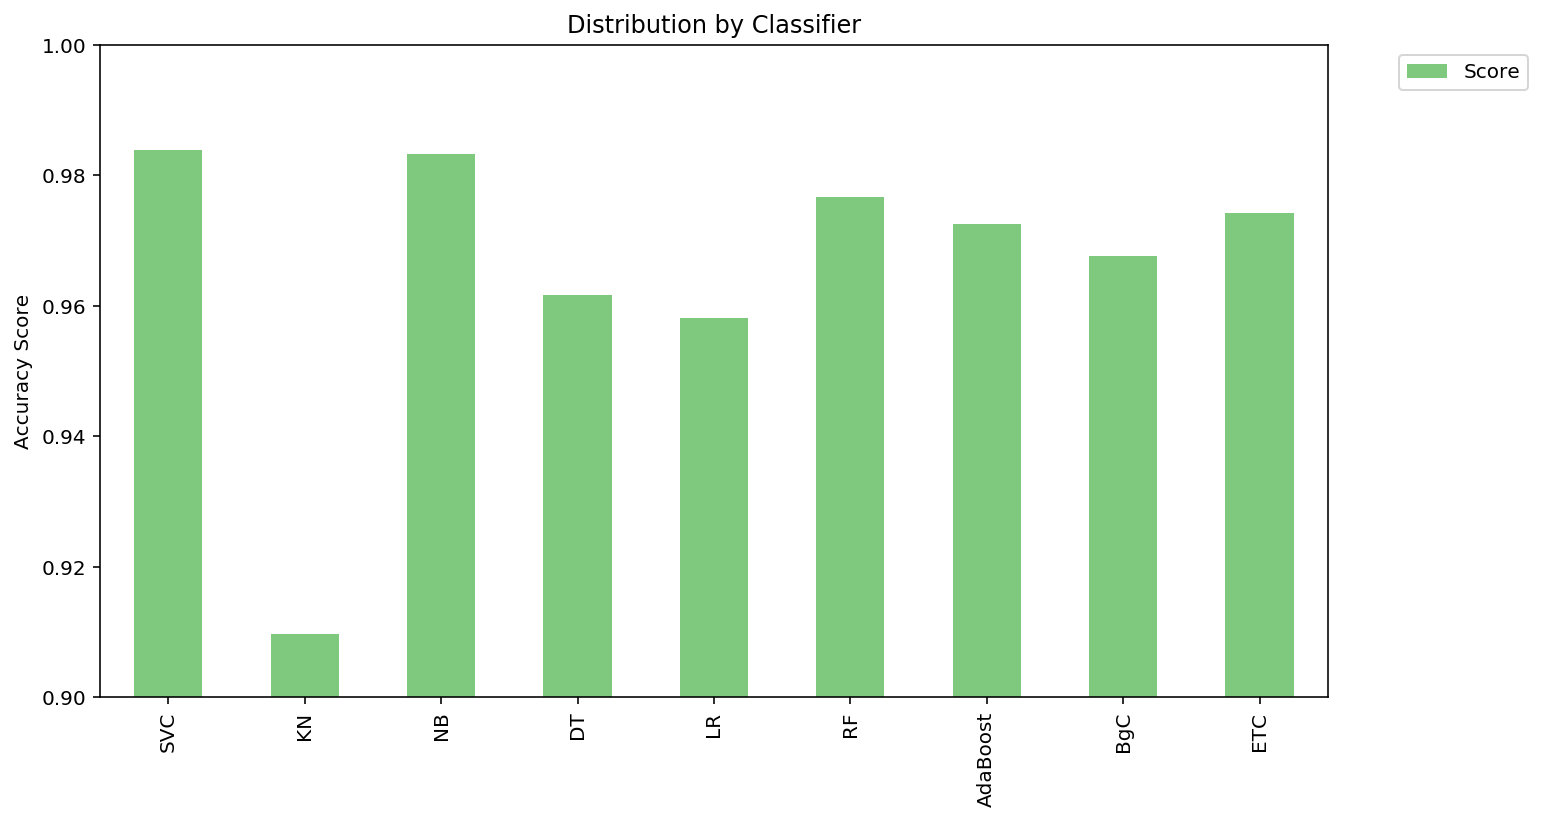

In [49]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # borderaxespad=0.)
# %config InlineBackend.figure_format = 'retina'

# 연습

In [50]:
import string
obj = "python"
before = "thon"
after = "zzyy"
sen = obj.maketrans(before, after)   # construct translation table
sen

{116: 122, 104: 122, 111: 121, 110: 121}

In [51]:
obj.translate(sen)                   # translate base on the table

'pyzzyy'

### Replacing words or characters in Python
- maketrans(): maketrans() function is used to construct the transition table i.e specify the list of 
  characters that need to be replaced in the whole string or the characters that need to be deleted 
  from the string
- Translate using maketrans(): To translate the characters in the string translate() is used to make the
  translations. This function uses the translation mapping specified using the maketrans().

In [32]:
# Python3 code to demostrate  
# translations using  
# maketrans() and translate() 
  
# specify to translate chars 
str1 = "wy"
# specify to to replace with 
str2 = "gf"
# delete chars 
str3 = "u"
# target string  
trg = "weeksyourweeks"
  
# using maketrans() to  
# construct translate table 
table = trg.maketrans(str1, str2, str3) 
  
# Printing original string  
print ("The string before translating is : ", end ="") 
print (trg) 
  
# using translate() to make translations. 
print ("The string after translating is : ", end ="") 
print (trg.translate(table)) 

The string before translating is : weeksyourweeks
The string after translating is : geeksforgeeks


In [33]:
# 문자열 바꾸기
'Hello, world!'.replace('world', 'Python')

'Hello, Python!'

In [36]:
# 문자 바꾸기
table = str.maketrans('aeiou', '12345')
'apple'.translate(table)

'1ppl2'

In [37]:
# 문자열 분리하기
'apple, pear, grape, pineapple, orange'.split(', ')

['apple', 'pear', 'grape', 'pineapple', 'orange']

In [39]:
# 구분자 문자열과 문자열 리스트 연결하기
' '.join(['apple', 'pear', 'grape', 'pineapple', 'orange'])
'-'.join(['apple', 'pear', 'grape', 'pineapple', 'orange'])

'apple-pear-grape-pineapple-orange'

In [41]:
# 양쪽 공백 삭제하기 & 양쪽 특정문자 삭제하기
'   Python   '.strip()
', python.'.strip(',.')

' python'

In [42]:
# 구두점을 간단하게 삭제하기
import string
', python.'.strip(string.punctuation)

' python'

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
 ', python.'.strip(string.punctuation + ' ')

'python'

In [45]:
', python.'.strip(string.punctuation).strip()   # 체인형

'python'

In [54]:
def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
import nltk
nltk.download('stopwords')

In [64]:
help(enumerate(stopwords.words('english'),1))

Help on enumerate object:

class enumerate(object)
 |  enumerate(iterable[, start]) -> iterator for index, value of iterable
 |  
 |  Return an enumerate object.  iterable must be another object that supports
 |  iteration.  The enumerate object yields pairs containing a count (from
 |  start, which defaults to zero) and a value yielded by the iterable argument.
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



In [57]:
text_process(' ,,,text...  ')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rta_note\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'text'